In [2]:
import json
import numpy as np

from graphviz import Digraph

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = {}
with open('../data/MVGSmall.json', 'r') as f:
    data = json.load(f)

In [4]:
foundOptimal = np.zeros(len(data.keys()))
numberGenerations = np.zeros(len(data.keys()), dtype=int)
maxFitness = np.zeros((len(data.keys()), 10000))
avgFitness = np.zeros((len(data.keys()), 10000))
perfectG1 = [[]] * len(data.keys())
perfectG2 = [[]] * len(data.keys())

for iter in data.keys():
    foundOptimal[int(iter)] = data[iter]['foundOptimal']
    numberGenerations[int(iter)] = int(data[iter]['numberGenerations'])
    maxFitness[int(iter), :] = np.array(data[iter]['maxFitness'])
    avgFitness[int(iter), :] = np.array(data[iter]['avgFitness'])
    perfectG1[int(iter)] = data[iter]['perfectG1']
    perfectG2[int(iter)] = data[iter]['perfectG2']

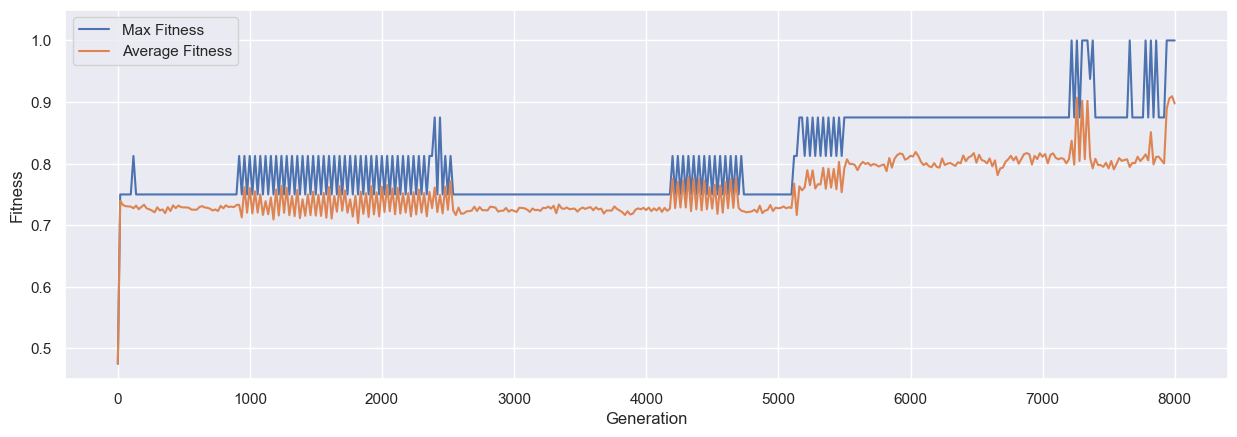

In [5]:
iter = 0
x = np.concatenate(([1], list(range(19, numberGenerations[iter], 20))))
max = np.concatenate(([maxFitness[iter, 0]], maxFitness[iter, 19:numberGenerations[iter]:20]))
avg = np.concatenate(([avgFitness[iter, 0]], avgFitness[iter, 19:numberGenerations[iter]:20]))


plt.figure().set_figwidth(15)
plt.plot(x, max, label='Max Fitness')
plt.plot(x, avg, label='Average Fitness')
plt.ylim(0.45, 1.05);
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend();

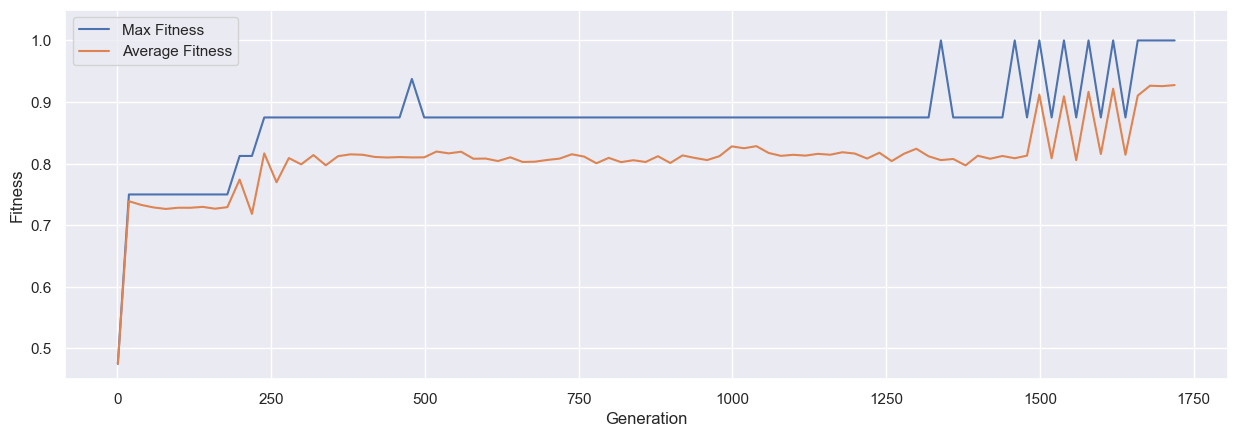

In [6]:
iter = 8
x = np.concatenate(([1], list(range(19, numberGenerations[iter], 20))))
maxFit = np.concatenate(([maxFitness[iter, 0]], maxFitness[iter, 19:numberGenerations[iter]:20]))
avgFit = np.concatenate(([avgFitness[iter, 0]], avgFitness[iter, 19:numberGenerations[iter]:20]))


plt.figure().set_figwidth(15)
plt.plot(x, maxFit, label='Max Fitness')
plt.plot(x, avgFit, label='Average Fitness')
plt.ylim(0.45, 1.05);
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend();

## Good Graphs to use:

- 11 - Shows back and forth of not converging
- 1 - Shows that it can find optimal for long stretches and still not converge
- 17 - Shows long time before convergence
- 8 - Shows very quick convergence

In [7]:
np.sum(foundOptimal)

50.0

In [8]:
firstOptimal = np.zeros(len(data.keys()), dtype=int)

for i in range(len(data.keys())):
    firstOptimal[i] = np.where(maxFitness[i, :] == 1)[0][0]

firstOptimal

array([7209, 2212,  454, 3749, 3096, 5094, 1677, 3375, 1334, 1491, 2370,
       3493,  836, 5508, 3298, 5319, 1216, 3729, 1754, 2230, 2330, 4115,
        648,  372, 4525,  718, 5407, 2850, 2346, 2415, 9194, 1595, 1376,
       1713, 4576, 1371, 8259, 1210, 3312, 1549, 4416, 2945, 2916,  912,
       2991, 1432, 1216, 2750, 8317,  276])

In [9]:
print(np.average(firstOptimal))
print(np.min(firstOptimal))
print(np.max(firstOptimal))

2949.92
276
9194


In [10]:
print(np.sum(numberGenerations < 10000))
print(np.average(numberGenerations[numberGenerations < 10000]))
print(np.min(numberGenerations[numberGenerations < 10000]))
print(np.max(numberGenerations[numberGenerations < 10000]))

38
5232.105263157895
1720
9790


# Circuit Analysis

In [11]:
def createGraph(genome, numInputs, connectionSize):
    n = int((len(genome) - numInputs) / (2*connectionSize+2))
    graphReverse = {}

    for i in range(n):
        pointer = i * (connectionSize * 2 + 2)

        gate = genome[pointer] * 2 + genome[pointer+1]
        connection1 = 0
        connection2 = 0

        for j in genome[pointer+2:pointer+2+connectionSize]:
            connection1 = 2 * connection1 + j

        for j in genome[pointer+2+connectionSize:pointer+2+2*connectionSize]:
            connection2 = 2 * connection2 + j

        if gate != 3:
            graphReverse[i+numInputs] = [connection1, connection2]

    output = 0
    for j in genome[-connectionSize:]:
        output = 2 * output + j
    graphReverse[n+numInputs] = [output]

    return graphReverse

In [31]:
def createGraphviz(graph, name='graph'):
    dot = Digraph(name, format='svg')
    dot.attr(rankdir='UD')
    dot.attr('node', width='.4', fixedsize='true', shape='circle')

    dot.node(str(0), 'x')
    dot.node(str(1), 'y')
    dot.node(str(2), 'z')
    dot.node(str(3), 'w')
    dot.node(str(16), 'out')

    for u, edges in graph.items():
        for v in edges:
            if not v in graph and v >= 4:
                dot.node(str(v), '', shape='none')
            dot.edge(str(v), str(u))
            

    return dot

In [13]:
numInputs = 4  # number of inputs into network
connectionSize = 4  # num bits per connection

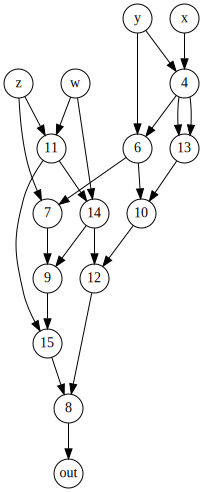

In [14]:
genome = perfectG2[10][4]
genome = [int(x) for x in genome]
graphReverse = createGraph(genome, numInputs, connectionSize)
dot = createGraphviz(graphReverse)
dot

# Good Graphs:

- G1 and G2, 3, -1 - Typical examples
- G2, 6, -1 - Wacky graph
- G1, 10, -1 - Alternate G1 example

# Figure Generation

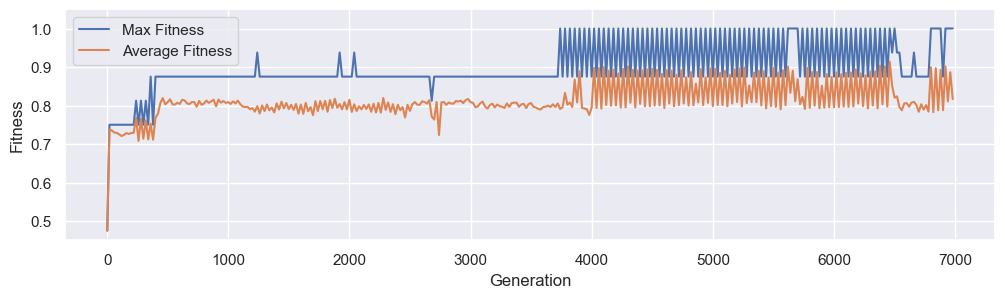

In [28]:
iter = 17
x = np.concatenate(([1], list(range(19, numberGenerations[iter], 20))))
maxFit = np.concatenate(([maxFitness[iter, 0]], maxFitness[iter, 19:numberGenerations[iter]:20]))
avgFit = np.concatenate(([avgFitness[iter, 0]], avgFitness[iter, 19:numberGenerations[iter]:20]))


fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(3)
plt.plot(x, maxFit, label='Max Fitness')
plt.plot(x, avgFit, label='Average Fitness')
plt.ylim(0.45, 1.05);
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('plots/MVGSmall'+str(iter)+'.svg', format='svg')

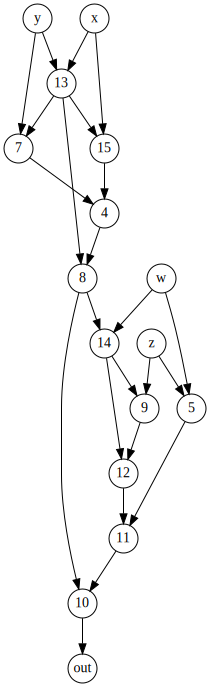

In [40]:
iter = 6
genome = perfectG2[iter][-1]
genome = [int(x) for x in genome]
graphReverse = createGraph(genome, numInputs, connectionSize)
dot = createGraphviz(graphReverse, 'MVGSmallG2_'+str(iter))
# dot.render(directory='circuits')
dot